<a href="https://colab.research.google.com/github/Melvinmcrn/DataScience/blob/master/Activity5_DataPrep/Activity5_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Melvinmcrn/DataScience/master/Activity5_DataPrep/titanic_training_dataset.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize

We don't show PassengerId, Name because we know that they are unique.

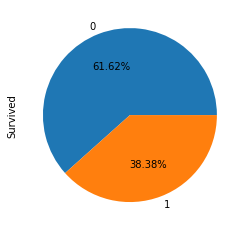

In [6]:
data['Survived'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%')

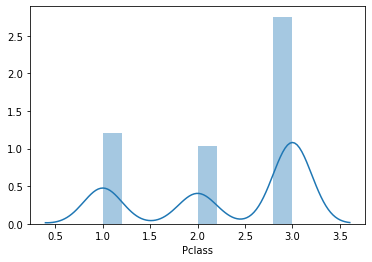

In [7]:
sns.distplot(data['Pclass'], label='Pclass')

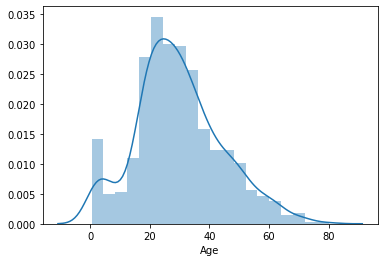

In [8]:
sns.distplot(data['Age'], label='Age')

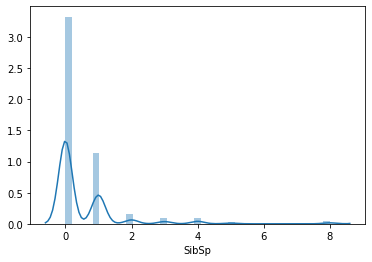

In [9]:
sns.distplot(data['SibSp'], label='Sibling/Spouse')

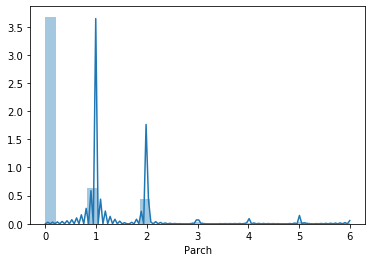

In [10]:
sns.distplot(data['Parch'], label='Parents/Children')

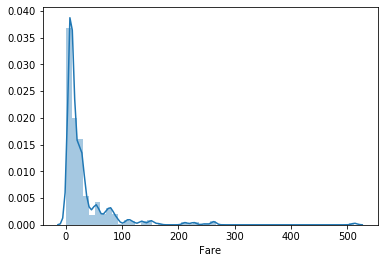

In [11]:
sns.distplot(data['Fare'], label='Fare')

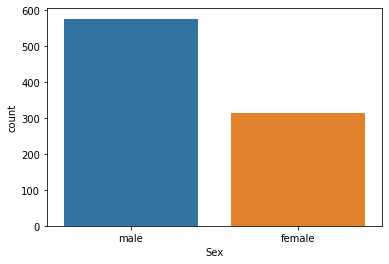

In [12]:
sns.countplot(data['Sex'], label='Sex')

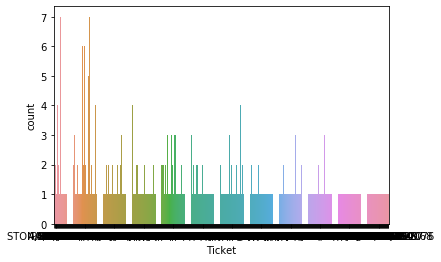

In [13]:
sns.countplot(data['Ticket'], label='Ticket')

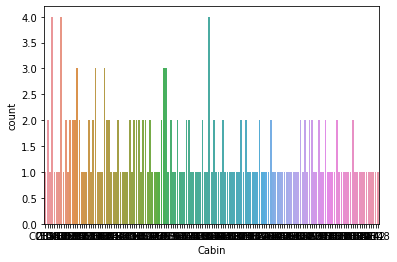

In [14]:
sns.countplot(data['Cabin'], label='Cabin')

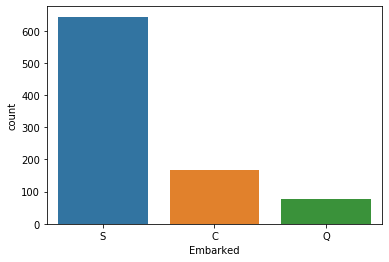

In [15]:
sns.countplot(data['Embarked'], label='Embarked')

## Narrowing down columns

We will drop some data which is not related such as PassengerId, Name and some data which is quite unique such as Ticket and Cabin.<br>
Moreover, Cabin has lots of missing value so we shouldn't use it too.

In [16]:
drop_list = ['PassengerId','Name','Ticket','Cabin']
dropped_data = data.drop(drop_list, axis=1)
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
dropped_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Only 'Age' and 'Embarked' has missing values but not much so it's ok. We will fill missing values later.

In [18]:
columns = dropped_data.columns
for c in columns:
  print(dropped_data[c].value_counts())
  print()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64



## Impute missing values

In [19]:
dropped_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
mean_age = dropped_data['Age'].mean()
median_age = dropped_data['Age'].median()
print(mean_age,median_age)

29.69911764705882 28.0


In [21]:
mode_embarked = dropped_data['Embarked'].mode().iloc[0]
mode_embarked

'S'

In [22]:
filled_data = dropped_data
filled_data['Age'].fillna(mean_age, inplace=True)
filled_data['Embarked'].fillna(mode_embarked, inplace=True)
filled_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Categorical to numerical variables

In [23]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We can see than there are 2 categorical columns which is 'Sex' and 'Embarked'.<br>
<li>For 'Sex', there are only 2 values which is 'Male' or 'Female' so we will use 0='Male' and 1='Female'.<br>
<li>For 'Embarked' there are 3 values so we will use dummy codes.

In [24]:
mapping_dict = { 'Sex': {'male':0, 'female':1}}
numeric_data = filled_data.replace(mapping_dict)
numeric_data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [25]:
dummy = pd.get_dummies(numeric_data['Embarked'], drop_first=False)
dummy.head(5)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
numeric_data = pd.concat([numeric_data, dummy], axis=1)
numeric_data = numeric_data.drop(['Embarked'], axis=1)
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


## Outliers

In [27]:
outlier_data = numeric_data
outlier_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [0]:
def showOutlier(col):
  plt.figure(figsize=(10,8))
  plt.subplot(211)
  plt.xlim(outlier_data[col].min(), outlier_data[col].max()*1.1)

  ax = outlier_data[col].plot(kind='kde')

  plt.subplot(212)
  plt.xlim(outlier_data[col].min(), outlier_data[col].max()*1.1)
  sns.boxplot(x=outlier_data[col])

  q75, q25 = np.percentile(outlier_data[col], [75 ,25])
  iqr = q75 - q25

  min = q25 - (iqr*1.5)
  max = q75 + (iqr*1.5)
  upper = int(outlier_data.loc[outlier_data[col]>max].count()[0])
  lower = int(outlier_data.loc[outlier_data[col]<min].count()[0])
  print(col + ' = Lower: ' + str(lower) + ' & Upper: ' + str(upper) + ' the rest = ' + str(891 - upper - lower) )
  
  plt.axvline(x=min)
  plt.axvline(x=max)

  kurtosis_before_value = kurtosis(outlier_data[col])
  print("kurtosis_before_value = ", kurtosis_before_value)
  skew_before_value = skew(outlier_data[col])
  print("skew_before_value = ", skew_before_value)
  print()

  return (min,max)

Age = Lower: 24 & Upper: 42 the rest = 825
kurtosis_before_value =  0.9541389157820586
skew_before_value =  0.4337562902461274

Fare = Lower: 0 & Upper: 116 the rest = 775
kurtosis_before_value =  33.20428925264474
skew_before_value =  4.7792532923723545



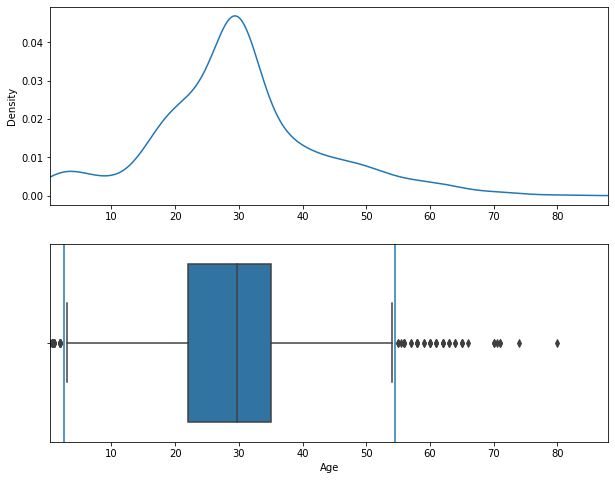

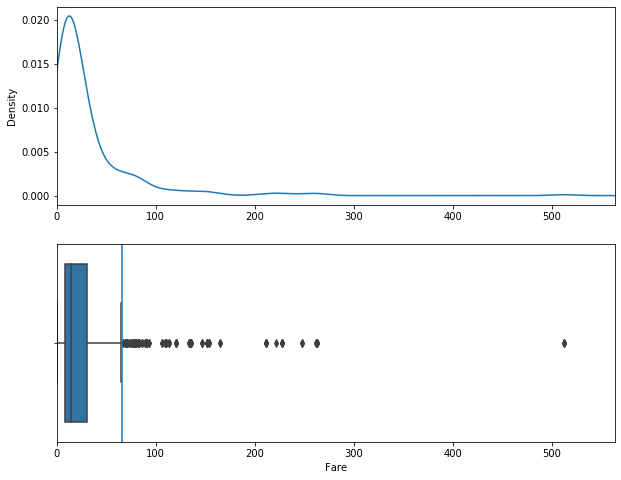

In [29]:
col = ['Age', 'Fare']
minmax = dict()
for c in col:
  minmax[c] = showOutlier(c)

We can see that 'Age' has some outliers (about 7%) and 'Fare' is right skewed.

In [30]:
outlier_data = numeric_data

# Remove any zeros (otherwise we get (-inf)
outlier_data.loc[outlier_data['Fare'] == 0, 'Fare'] = np.nan

# Drop NA
print()
outlier_data.dropna(inplace=True)

# Log Transform เพื่อแก้ปัญหาการเบ้
outlier_data['Log_Fair'] = np.log(outlier_data['Fare'])

Log_Fair = Lower: 0 & Upper: 11 the rest = 880
kurtosis_before_value =  0.0852765437176859
skew_before_value =  0.8997279130811034

(0.010827214878899039, 5.502014161237421)


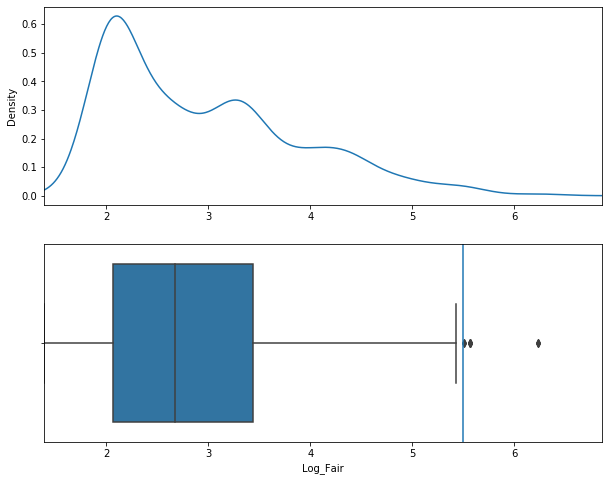

In [31]:
minmax['Log_Fair'] = showOutlier('Log_Fair')
print(minmax['Log_Fair'])

Now, remove the rest of the outliers.

In [32]:
outlier_data.shape

(876, 11)

In [0]:
for col in minmax.keys():
  if col is not 'Fare':
    outlier_data = outlier_data[outlier_data[col] > minmax[col][0] ]
    outlier_data = outlier_data[outlier_data[col] < minmax[col][1] ]

In [34]:
outlier_data.shape

(800, 11)

Log_Fair = Lower: 0 & Upper: 4 the rest = 887
kurtosis_before_value =  -0.27678118329418355
skew_before_value =  0.8348172440782758

Age = Lower: 20 & Upper: 22 the rest = 849
kurtosis_before_value =  0.31556095130917683
skew_before_value =  0.058906878390322236



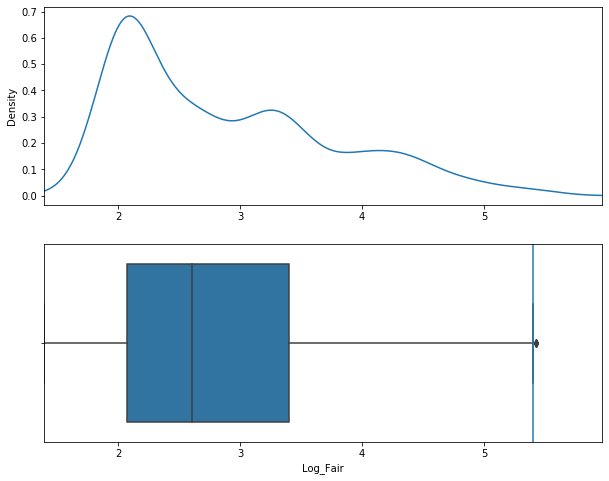

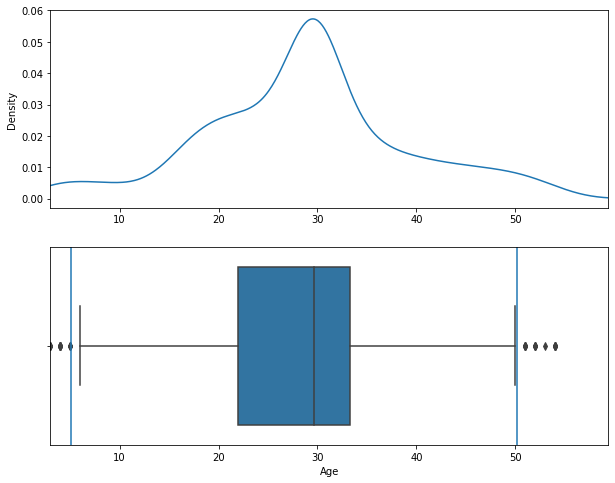

In [35]:
for c in ['Log_Fair','Age']:
  showOutlier(c)

## s